In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))
from src.models import ModelTrainer
from src.evaluation import plot_prediction_performance

%matplotlib inline

## 2. Load Processed Data
Same as before, we load the training and testing data.

In [2]:
PROCESSED_DIR = '../data/processed'

X_train = pd.read_csv(f'{PROCESSED_DIR}/X_train.csv', index_col=0)
X_test = pd.read_csv(f'{PROCESSED_DIR}/X_test.csv', index_col=0)
y_train = pd.read_csv(f'{PROCESSED_DIR}/y_train.csv', index_col=0).values.ravel()
y_test = pd.read_csv(f'{PROCESSED_DIR}/y_test.csv', index_col=0).values.ravel()

## 3. Retrain Champion Model
We will retrain the **XGBoost** model to ensure we have the live object for prediction.

In [3]:
trainer = ModelTrainer(X_train, y_train, X_test, y_test)
model = trainer.train_xgboost()
metrics = trainer.evaluate_model('XGBoost')

print("Final Test Performance:")
print(metrics)

Training XGBoost...
Final Test Performance:
{'Train RMSE': np.float64(0.0501740452942701), 'Test RMSE': np.float64(1.756973346188958), 'CV RMSE': np.float64(1.919236714481799), 'Test R2': -0.1773759071194676}


## 4. Visual Diagnostics
We generate two critical plots:
1.  **Predicted vs Actual:** How close are we to the diagonal line?
2.  **Residual Plot:** Do errors have a pattern? (e.g., do we consistently underestimate sensitive cells?)

Plot saved to ../results/figures/xgboost_performance.png


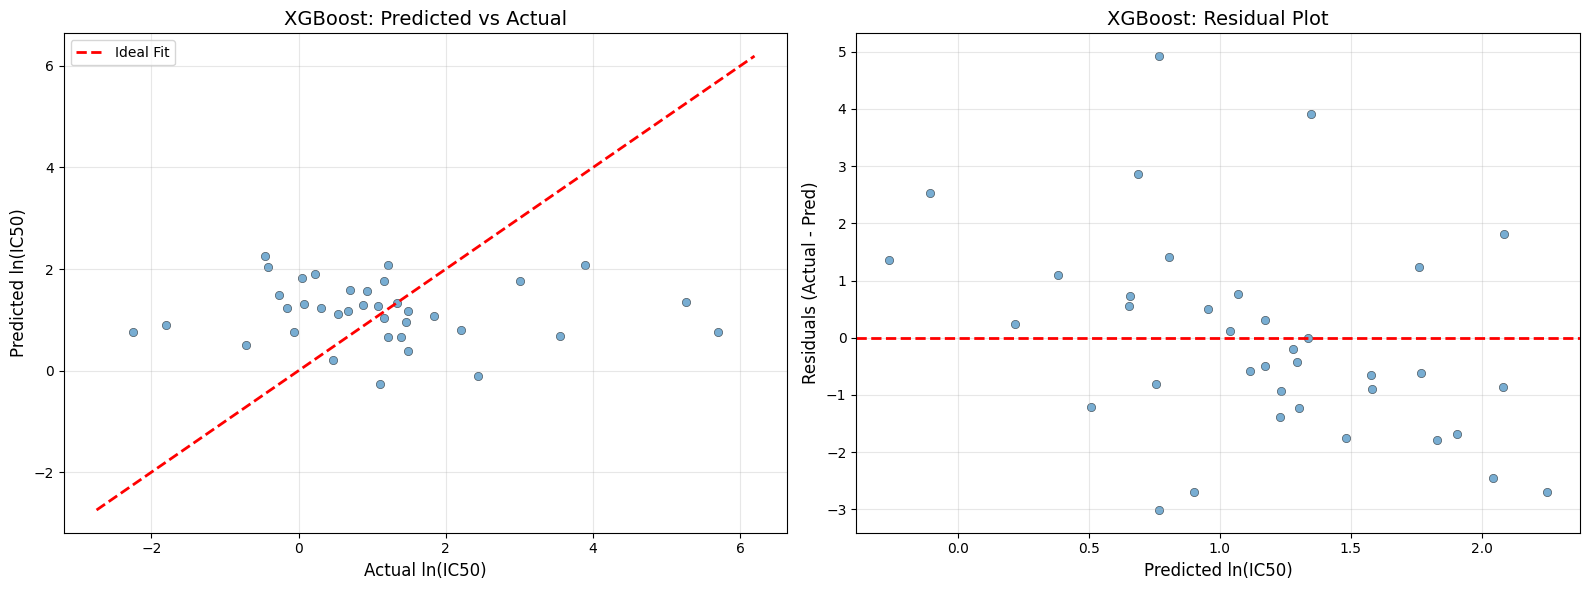

In [4]:
# Get predictions
y_pred = model.predict(X_test)

# Plot
plot_prediction_performance(y_test, y_pred, 'XGBoost', save_path='../results/figures/xgboost_performance.png')

## 5. Residual Analysis
- **Homoscedasticity:** We want the residuals to be randomly scattered around 0.
- **Bias:** If high IC50 values (Resistant) have consistently positive residuals, our model is under-predicting resistance.
- **Outliers:** Points far from 0 are cell lines that behave unexpectedly—biologically interesting candidates for further study.